In [1]:
import torch
import torchvision
import torch.nn as nn
import  torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline


## Convolution

In [2]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)

In [3]:
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [4]:
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.1174,  0.3065, -0.0189],
                        [-0.1172,  0.1658,  0.1798],
                        [ 0.3127,  0.1771, -0.0464]]]])),
             ('bias', tensor([-0.0737]))])

In [5]:
# change the values of the kernel
conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

# Max Pooling

In [6]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

In [7]:
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1)

tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

In [8]:
max1=torch.nn.MaxPool2d(2)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

# Multi Channel Conv

In [9]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)

conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

In [10]:
conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


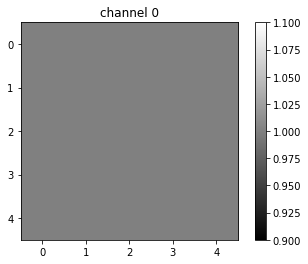

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


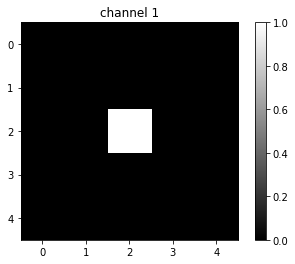

In [11]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [12]:
z=conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<MkldnnConvolutionBackward>)

### CNN - MNIST Classifier 

In [13]:
IMAGE_SIZE = 32
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [14]:
train = datasets.MNIST(root='./data', train=True, download=True, transform=composed)
test = datasets.MNIST(root='./data', train=False, download=True, transform=composed)

100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


100.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


180.4%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [15]:
type(train)

torchvision.datasets.mnist.MNIST

In [16]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

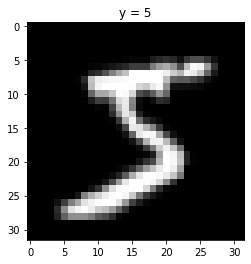

In [17]:
show_data(train[0])

In [18]:
# Building a Convolutional Neural Network

class CNN(nn.Module):
  
  def __init__(self, out_0=8, out_1=16, out_2 =32, out_3=16):
    super(CNN, self).__init__()
    
    self.cnn_0 = nn.Conv2d(in_channels=1, out_channels=out_0, kernel_size=3, padding=0)
    self.maxpool_0 = nn.MaxPool2d(kernel_size=2)
    
    self.cnn_1 = nn.Conv2d(in_channels=out_0, out_channels=out_1, kernel_size=5, padding=2)
    self.macpool_1 = nn.MaxPool2d(kernel_size=2)
    
    self.cnn_2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, padding=2)
    self.macpool_2 = nn.MaxPool2d(kernel_size=3)
    
    self.cnn_3 = nn.Conv2d(in_channels=out_2, out_channels=out_3, kernel_size=5, padding=2)
    self.macpool_3 = nn.MaxPool2d(kernel_size=4)
    
    
    
    


In [19]:
maxpool2=nn.MaxPool2d(kernel_size=2)

In [21]:
# maxpool2().shape

In [22]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [23]:
print(device)

cuda:0


In [24]:
# Hyper parameters
num_epochs = 10
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [26]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

Using downloaded and verified file: ../../data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw
Using downloaded and verified file: ../../data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw


100.4%

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


180.4%

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


In [27]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [28]:
model = ConvNet(num_classes).to(device)

In [29]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        
        # Forward pass
        outputs = model(images)
        
        print(labels.size(), outputs.size())
        print(labels.type(), outputs.type())
        break
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    break

torch.Size([100]) torch.Size([100, 10])
torch.cuda.LongTensor torch.cuda.FloatTensor


In [45]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 99.18 %
